In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
country_df= pd.read_csv("Country-data.csv")

In [59]:
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [60]:
country_df.shape

(167, 10)

In [61]:
country_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [62]:
highest_gdp=country_df.nlargest(5,"gdpp")
highest_gdp

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000
114,Norway,3.2,39.7,9.48,28.5,62300,5.950,81.0,1.95,87800
145,Switzerland,4.5,64.0,11.50,53.3,55500,0.317,82.2,1.52,74600
123,Qatar,9.0,62.3,1.81,23.8,125000,6.980,79.5,2.07,70300
44,Denmark,4.1,50.5,11.40,43.6,44000,3.220,79.5,1.87,58000


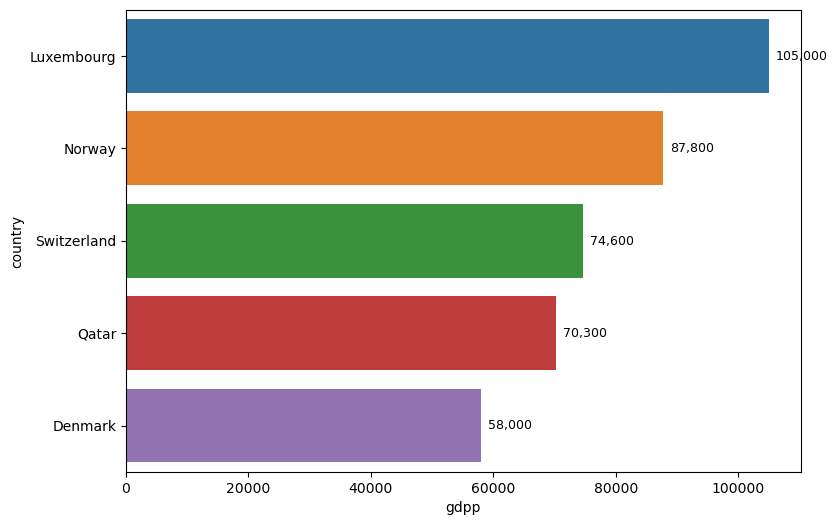

In [63]:
plt.figure(figsize=(10,6))
plt.subplots_adjust(right=0.8)
ax=sns.barplot(data=highest_gdp,x="gdpp",y="country")
for p in ax.patches:
    ax.annotate(f"{p.get_width():,.0f}",(p.get_width(),p.get_y()+p.get_height()/2),ha="left",va="center",fontsize=9,color="black"
               ,xytext=(5, 0),textcoords='offset points')
plt.show()              


In [64]:
highest_income=country_df.nlargest(10,"income")
highest_income

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
123,Qatar,9.0,62.3,1.81,23.8,125000,6.980,79.5,2.07,70300
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000
23,Brunei,10.5,67.4,2.84,28.0,80600,16.700,77.1,1.84,35300
82,Kuwait,10.8,66.7,2.63,30.4,75200,11.200,78.2,2.21,38500
133,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46600
114,Norway,3.2,39.7,9.48,28.5,62300,5.950,81.0,1.95,87800
157,United Arab Emirates,8.6,77.7,3.66,63.6,57600,12.500,76.5,1.87,35000
145,Switzerland,4.5,64.0,11.50,53.3,55500,0.317,82.2,1.52,74600
159,United States,7.3,12.4,17.90,15.8,49400,1.220,78.7,1.93,48400
73,Ireland,4.2,103.0,9.19,86.5,45700,-3.220,80.4,2.05,48700


In [65]:
low_inflation=country_df.loc[country_df["inflation"]<0]


In [66]:
low_inflation=low_inflation.sort_values(by="inflation",ascending=True)
low_inflation

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
131,Seychelles,14.4,93.8,3.40,108.0,20400,-4.210,73.4,2.17,10800
73,Ireland,4.2,103.0,9.19,86.5,45700,-3.220,80.4,2.05,48700
77,Japan,3.2,15.0,9.49,13.6,35800,-1.900,82.8,1.39,44500
43,Czech Republic,3.4,66.0,7.88,62.9,28300,-1.430,77.5,1.51,19800
135,Slovenia,3.2,64.3,9.41,62.9,28700,-0.987,79.5,1.57,23400
85,Latvia,7.8,53.7,6.68,55.1,18300,-0.812,73.1,1.36,11300
10,Bahamas,13.8,35.0,7.89,43.7,22900,-0.393,73.8,1.86,28000
133,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46600


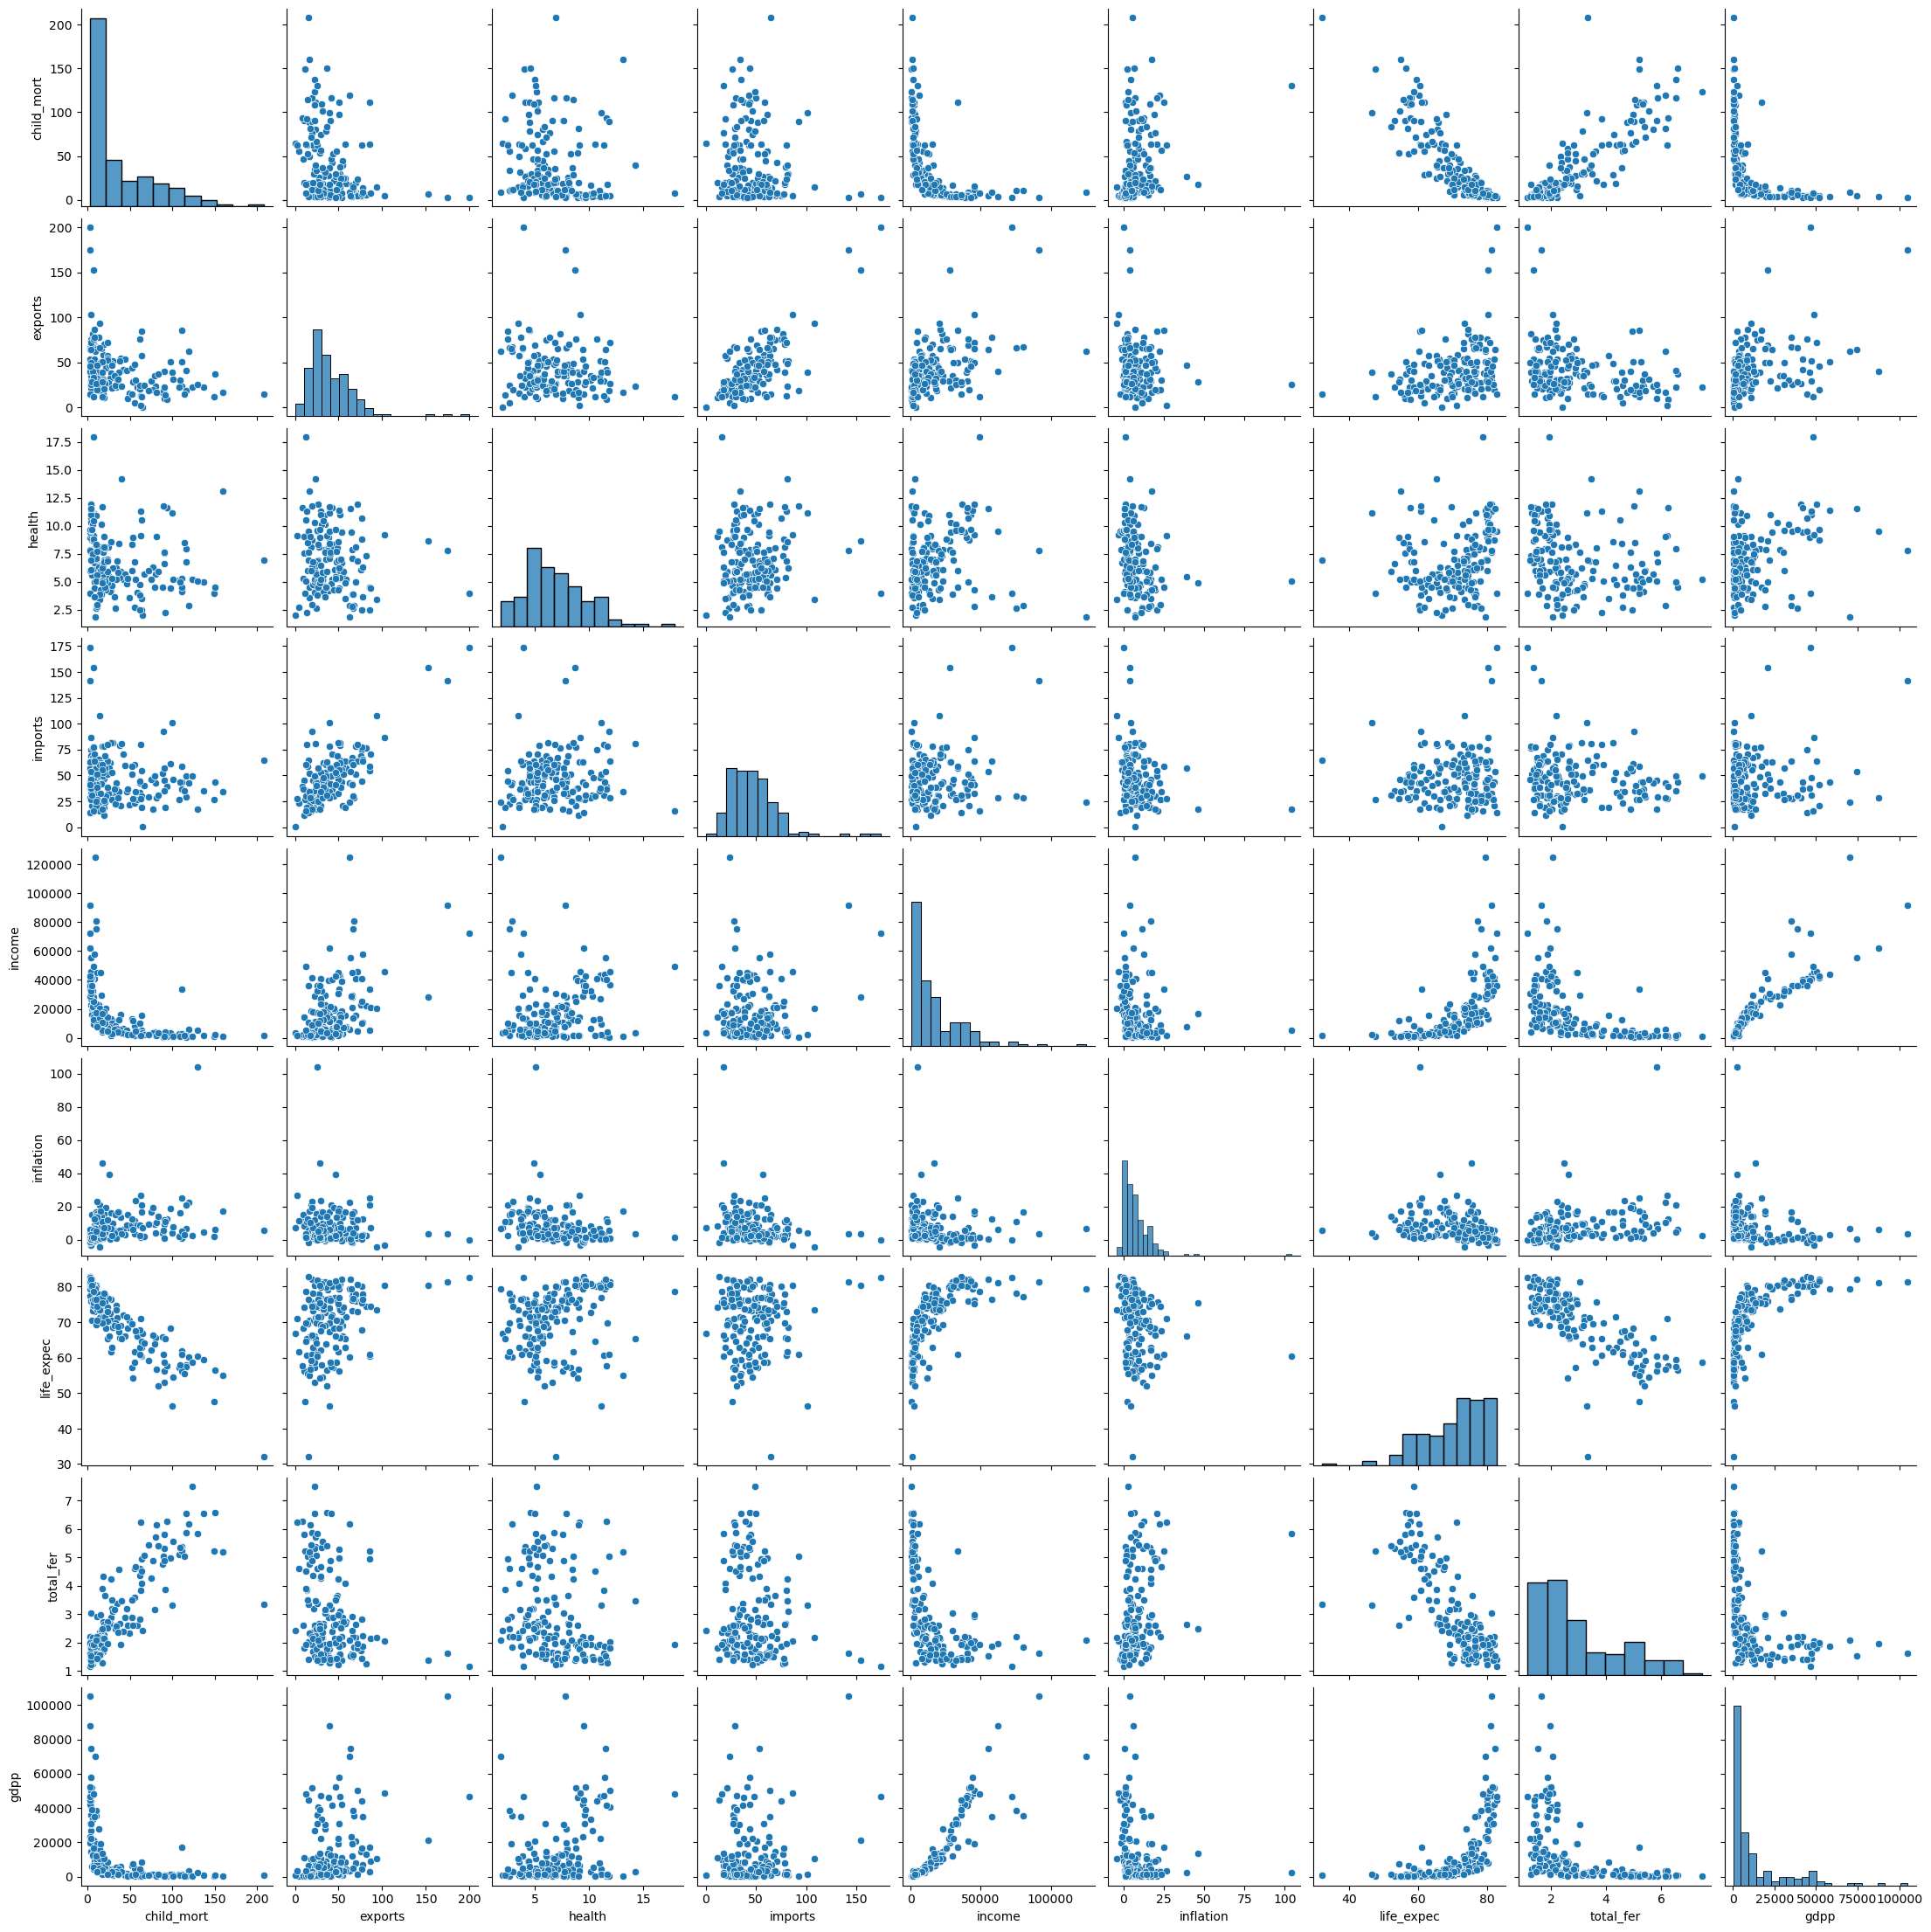

In [67]:
sns.pairplot(country_df)

In [68]:
corr=country_df.corr()

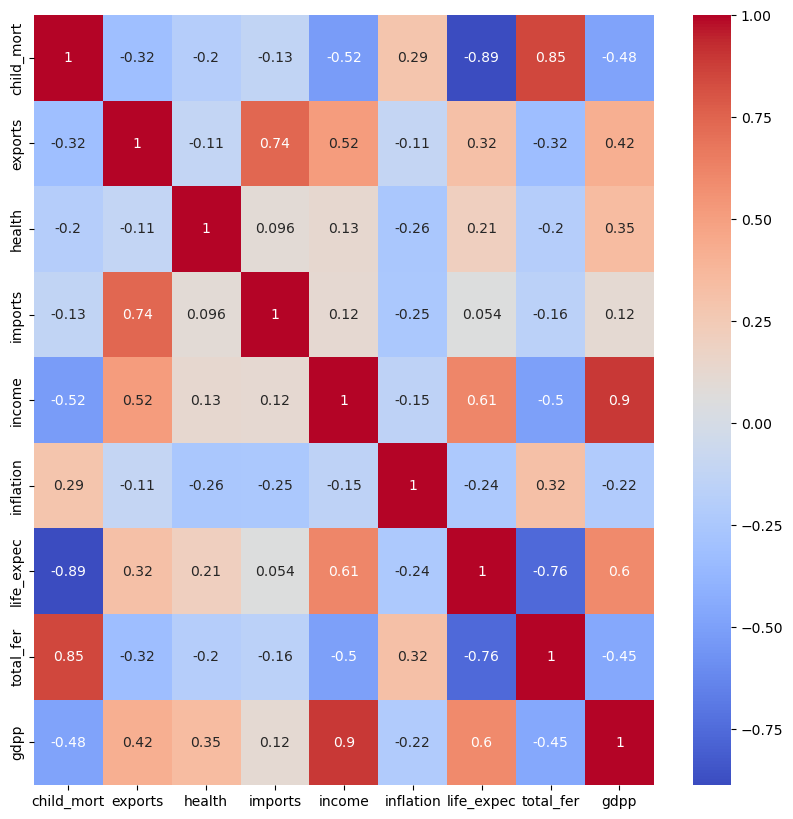

In [69]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True,cmap="coolwarm")
plt.show()

In [70]:
country_df.keys()

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [71]:
health_df=country_df[["health","life_expec","total_fer","child_mort"]]
health_df

,health,life_expec,total_fer,child_mort
0,7.58,56.2,5.82,90.2
1,6.55,76.3,1.65,16.6
2,4.17,76.5,2.89,27.3
3,2.85,60.1,6.16,119.0
4,6.03,76.8,2.13,10.3
...,...,...,...,...
162,5.25,63.0,3.50,29.2
163,4.91,75.4,2.47,17.1
164,6.84,73.1,1.95,23.3
165,5.18,67.5,4.67,56.3


In [72]:
health_corr=health_df.corr()

<AxesSubplot:>

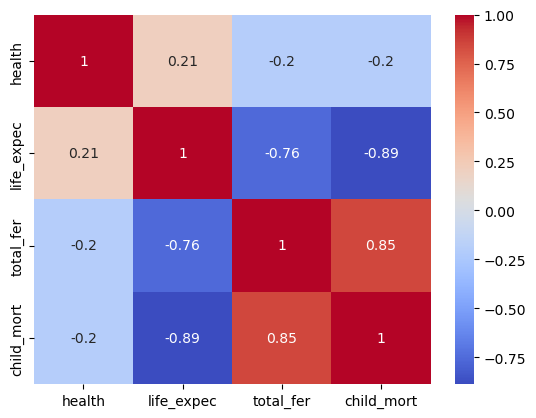

In [73]:
sns.heatmap(health_corr,annot=True,cmap="coolwarm")

In [74]:
# It can be inferred that life_expectancy decrease with high mortality
# child mortality and total fertility are highly corelative and hence one of the feature can be reduced

In [75]:
economic_df=country_df[["exports","imports","income","inflation","gdpp"]]
economic_df.head()

,exports,imports,income,inflation,gdpp
0,10.0,44.9,1610,9.44,553
1,28.0,48.6,9930,4.49,4090
2,38.4,31.4,12900,16.10,4460
3,62.3,42.9,5900,22.40,3530
4,45.5,58.9,19100,1.44,12200


In [76]:
economic_corr=economic_df.corr()

<AxesSubplot:>

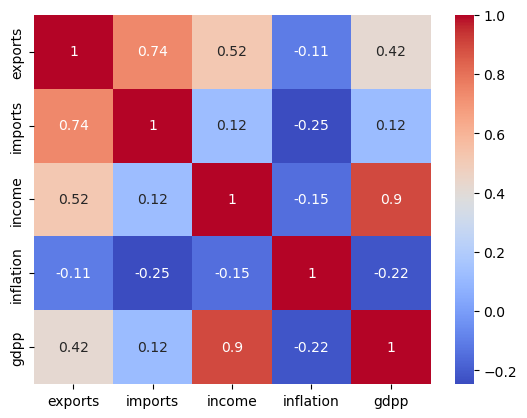

In [77]:
sns.heatmap(economic_corr,annot=True,cmap="coolwarm")

In [78]:
# income and gdpp are highly correlated
# inflation is inderectly proportional to exports and imports

In [79]:
df=country_df.drop(["country","income","child_mort"],axis=1)
df.head()

,exports,health,imports,inflation,life_expec,total_fer,gdpp
0,10.0,7.58,44.9,9.44,56.2,5.82,553
1,28.0,6.55,48.6,4.49,76.3,1.65,4090
2,38.4,4.17,31.4,16.10,76.5,2.89,4460
3,62.3,2.85,42.9,22.40,60.1,6.16,3530
4,45.5,6.03,58.9,1.44,76.8,2.13,12200


In [80]:
# checking the heatmap once again

In [81]:
df_corr=df.corr()

<AxesSubplot:>

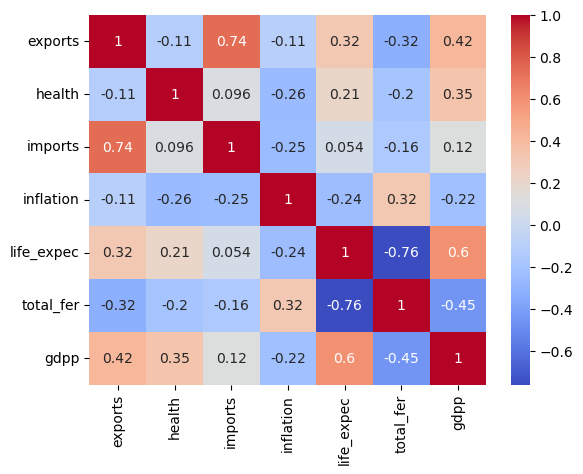

In [82]:
sns.heatmap(df_corr,annot=True,cmap="coolwarm")

In [83]:
# imports and exports are correlated to each other

In [84]:
df=df.drop(["exports"],axis=1)

In [85]:
from sklearn.preprocessing import StandardScaler

In [86]:
sc=StandardScaler()

# KMEANS MODEL

In [87]:
# Plotting the elbow graph

In [88]:
from sklearn.cluster import KMeans

In [89]:
clusters=[]

for n in range(1,10):
    kmm=KMeans(n_clusters=n).fit(df)
    clusters.append(kmm.inertia_)

C:\Users\rishabh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


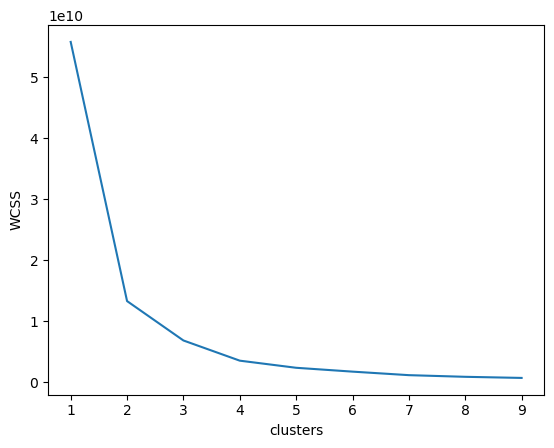

In [90]:
plt.plot(list(range(1,10)),clusters)
plt.xlabel("clusters")
plt.ylabel("WCSS")
plt.show()

In [91]:
# The optimal numner of n_cluster for the above model is 3

In [92]:
kmm_2 =KMeans(n_clusters=3)
kmm_2.fit(df)


KMeans(n_clusters=3)

In [93]:
df["Labels"]=kmm_2.labels_

In [94]:
df.head()

,health,imports,inflation,life_expec,total_fer,gdpp,Labels
0,7.58,44.9,9.44,56.2,5.82,553,0
1,6.55,48.6,4.49,76.3,1.65,4090,0
2,4.17,31.4,16.10,76.5,2.89,4460,0
3,2.85,42.9,22.40,60.1,6.16,3530,0
4,6.03,58.9,1.44,76.8,2.13,12200,0


In [95]:
#Plotting the grapgh to visualize cluster

C:\Users\rishabh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


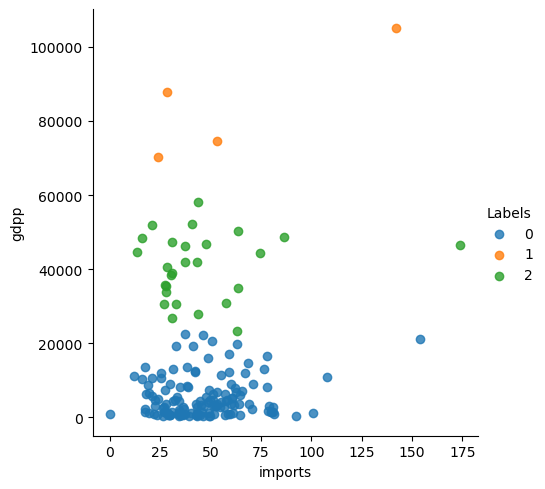

In [96]:
sns.lmplot("imports","gdpp",data=df,hue="Labels",fit_reg=False)

In [97]:
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [98]:
df2=country_df.drop(["country"],axis=1)

In [99]:
df1=pd.DataFrame()

In [100]:
df1["Health"]=(df2["health"]/df2["health"].mean()+df2["life_expec"]/df2["life_expec"].mean()+df2["child_mort"]/df2["child_mort"].mean()+df2["total_fer"]/df2["total_fer"].mean())
df1["Trade"]=(df2["exports"]/df2["exports"].mean()+df2["imports"]/df2["imports"].mean())

In [101]:
df1["Economy"]=(df2["income"]/df2["income"].mean()+df2["inflation"]/df2["inflation"].mean()+df2["gdpp"]/df2["gdpp"].mean())


In [102]:
df1.head()

,Health,Trade,Economy
0,6.239852,1.200812,1.349645
1,3.035901,1.717580,1.471658
2,3.389763,1.603752,3.165367
3,6.469020,2.430387,3.494919
4,2.964898,2.362940,2.240150


# PCA analysis

In [103]:
from sklearn.decomposition import PCA

In [104]:
pca=PCA()

In [105]:
df_pca=pd.DataFrame(pca.fit_transform(df1))


In [106]:
df_pca.head(3)

,0,1,2
0,-2.178125,1.895191,0.208161
1,-1.311103,-1.131738,-0.587582
2,0.239470,-0.355842,-0.610556


In [107]:
pca.explained_variance_ratio_

array([0.71320813, 0.18341197, 0.1033799 ])

In [108]:
clusters1=[]

for j in range(1,10):
    kmmp=KMeans(n_clusters=j).fit(df_pca)
    clusters1.append(kmmp.inertia_)

C:\Users\rishabh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


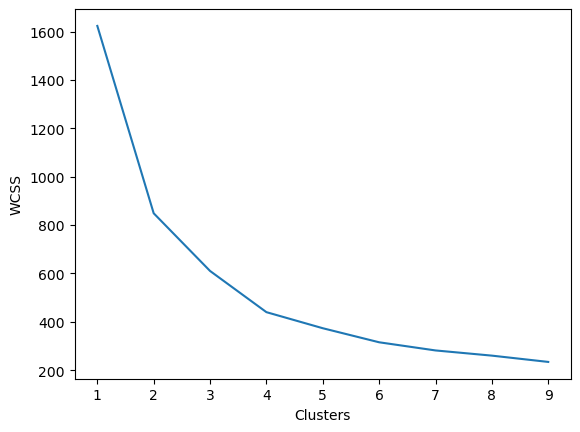

In [109]:
plt.plot(list(range(1,10)),clusters1)
plt.xlabel("Clusters")
plt.ylabel("WCSS")
plt.show()

In [110]:
# The appropriate cluster value is 4

In [111]:
kmmp2=KMeans(n_clusters=4)
kmmp2.fit(df_pca)

KMeans(n_clusters=4)

In [112]:
df_pca["Labels"]=kmmp2.labels_

In [113]:
df_pca.head(3)

,0,1,2,Labels
0,-2.178125,1.895191,0.208161,3
1,-1.311103,-1.131738,-0.587582,0
2,0.239470,-0.355842,-0.610556,0


In [118]:
df_pca["Health"]=df_pca.loc[0]

In [120]:
df_pca["Trade"]=df_pca[1]

In [122]:
df_pca["Economy"]=df_pca[2]

In [123]:
df_pca=df_pca.drop([0,1,2],axis=1)

In [125]:
df_pca.head(3)

,Labels,Health,Trade,Economy
0,3,-2.178125,1.895191,0.208161
1,0,1.895191,-1.131738,-0.587582
2,0,0.208161,-0.355842,-0.610556


C:\Users\rishabh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 1000x800 with 0 Axes>

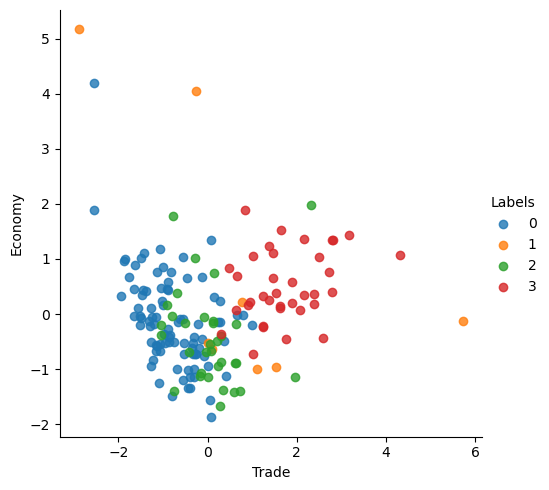

In [127]:
plt.figure(figsize=(10,8))
sns.lmplot("Trade","Economy",data=df_pca,hue="Labels",fit_reg=False)
plt.show()